1.5816021724372025
1.264382073749544
1.2872043010752696


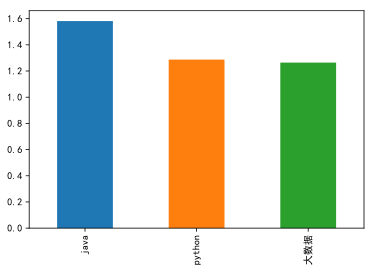

In [1]:
class JobInfo():
    def __init__(self):
        self.title = ""
        self.location = ""
        self.url = ""
        self.salary = ""

    
import pymysql
connect = pymysql.connect(
    host='localhost',
    port=3306,
    user='root',
    passwd='root',
    db='jobcrawler',
    charset='utf8'
)
cursor=connect.cursor()
#计算java的平均工资
sql="select salary from job where (title like '%Java%' or title like '%JAVA%')"
cursor.execute(sql)
java_salary=[]
java_salary_sum=0
sum_num=0
for row in cursor.fetchall():
    java_salary.append(row[0])

for item in java_salary:
    if '月' in item and '-' in item:
        if '万' in item:
            sum_num+=1
            count=item.find('-')
            java_salary_sum+=float(item[0:count])
           
        if '千' in item:
            sum_num+=1
            count=item.find('-')
            java_salary_sum+=float(item[0:count])/10
            
    if '年' in item:
        if '万' in item:
            sum_num+=1
            count=item.find('-')
            java_salary_sum+=float(item[0:count])/12
           
        if '千' in item:
            sum_num+=1
            count=item.find('-')
            java_salary_sum+=float(item[0:count])/10/12

java_salary_avg=java_salary_sum/sum_num
print(java_salary_avg)

#计算大数据的平均工资
sql1="select salary from job where title like '%数据%'"
cursor.execute(sql1)
da_salary=[]
da_salary_sum=0
sum_num=0
for row in cursor.fetchall():
    da_salary.append(row[0])

for item in da_salary:
    if '月' in item and '-' in item:
        if '万' in item:
            sum_num+=1
            count=item.find('-')
            da_salary_sum+=float(item[0:count])
           
        if '千' in item:
            sum_num+=1
            count=item.find('-')
            da_salary_sum+=float(item[0:count])/10
    if '年' in item and '-' in item:
        if '万' in item:
            sum_num+=1
            count=item.find('-')
            da_salary_sum+=float(item[0:count])/12           
        if '千' in item:
            sum_num+=1
            count=item.find('-')
            da_salary_sum+=float(item[0:count])/10/12

da_salary_avg=da_salary_sum/sum_num
print(da_salary_avg)    

#计算python的平均工资
sql2="select salary from job where  (title like '%Python%' or title like '%python%')"
cursor.execute(sql2)
python_salary=[]
python_salary_sum=0
sum_num=0
for row in cursor.fetchall():
    python_salary.append(row[0])

for item in python_salary:
    if '月' in item and '-' in item:
        if '万' in item:
            sum_num+=1
            count=item.find('-')
            python_salary_sum+=float(item[0:count])
           
        if '千' in item:
            sum_num+=1
            count=item.find('-')
            python_salary_sum+=float(item[0:count])/10
    if '年' in item and '-' in item:
        if '万' in item:
            sum_num+=1
            count=item.find('-')
            python_salary_sum+=float(item[0:count])/12           
        if '千' in item:
            sum_num+=1
            count=item.find('-')
            python_salary_sum+=float(item[0:count])/10/12

python_salary_avg=python_salary_sum/sum_num
print(python_salary_avg) 

avg_list={}
avg_list["java"]=java_salary_avg
avg_list["大数据"]=da_salary_avg
avg_list["python"]=python_salary_avg

import matplotlib.pyplot as plt
import pandas as pd
word_series = pd.Series(avg_list)
word_series = word_series.sort_values(ascending = False)
# word_series = pd.Series(word_list).value_counts()
# print(word_series)
plt.rcParams['font.sans-serif']=['SimHei']
%matplotlib inline
%config InlineBackend.figure_format='svg'
word_series.head(10).plot(kind='bar')
plt.show()
